In [28]:
df = pd.DataFrame()
for i in sorted(dgc.keys()):
    dgc = dgc[i].drop(columns=['ID'])
    df = pd.concat([df, dgc])

KeyError: 'M2'

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os


heade = ['ID', 'M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed', 'Mrem', 'Srem', 'esca_v', 'Mtot', 'gen']

path_data = './data/'
dyn = '/Dyn/' # Direi che così è facilmente customizzabile per come ogni autistic* si è sistemato i files.

def extractor(path_data, cluster):
    dataset = {}
    wichcluster = os.listdir(path_data)
    if cluster == 'gc':
        cluster = wichcluster[2]
    if cluster == 'nsc':
        cluster = wichcluster[1]
    if cluster == 'ysc':
        cluster = wichcluster[0]
    for i in os.listdir(path_data + cluster + dyn):
        name = path_data + cluster + '/Dyn/' + str(i) + '/nth_generation.txt'
        dataset[str(i)]=pd.read_csv(name, delimiter=' ', skiprows=1, header=None)#, names=heade)
        dataset[str(i)].drop(dataset[str(i)].columns[[5, 6, 7, 8, 10, 11, 12, 14, 18, 19, 20, 21, 22, 23, 24, 26]], axis=1, inplace=True)
        dataset[str(i)].columns = heade
    return dataset



In [14]:
df_gc = extractor(path_data,'gc') # globular clusters
#df_nsc = extractor(path_data,'nsc') # nuclear clusters
#df_ysc = extractor(path_data,'ysc') # young star clusters


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

In [15]:
# Load your dataset
dfa = df_gc

In [16]:
# Store feature importance results
feature_importances = {}
avg_importances_ysc = {}


for i in sorted(dfa.keys()):
    df = dfa[str(i)].drop(columns=['ID'])
    print(f'change z. {i}')
    # Iterate through each feature as the target
    for target_feature in df.columns:
        print(f'change feature, {target_feature}')
        # Define predictors (X) and target (y)
        X = df.drop(columns=[target_feature])
        y = df[target_feature]

        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a Random Forest model
        model = RandomForestRegressor(random_state=42, n_jobs=-1)
        model.fit(X_train, y_train)

        # Store feature importance for the current target
        feature_importances[target_feature] = model.feature_importances_

    # Convert to a DataFrame for easier interpretation
    importance_df = pd.DataFrame(feature_importances, index=X.columns)

    # Calculate average importance across all targets
    importance_df["average_importance"] = importance_df.mean(axis=1)

    # Sort features by average importance
    sorted_importances = importance_df["average_importance"].sort_values(ascending=False)
    print(sorted_importances)
    sorted_importances['Z-No correlation'] = i
    
    avg_importances_ysc[i] = sorted_importances
    

change z. 0.0002
change feature, M1
change feature, M2
change feature, S1
change feature, S2
change feature, t_pair
change feature, t_elapsed
change feature, Mrem
change feature, Srem
change feature, esca_v
change feature, Mtot
change feature, gen
t_elapsed    0.240332
esca_v       0.160507
M1           0.130751
Mrem         0.125610
S1           0.112735
M2           0.111477
t_pair       0.063521
Mtot         0.039476
S2           0.007888
Srem         0.007705
Name: average_importance, dtype: float64
change z. 0.0004
change feature, M1
change feature, M2
change feature, S1
change feature, S2
change feature, t_pair
change feature, t_elapsed
change feature, Mrem
change feature, Srem
change feature, esca_v
change feature, Mtot
change feature, gen
t_elapsed    0.222410
esca_v       0.155610
Mrem         0.138090
M1           0.131224
M2           0.117376
S1           0.113085
t_pair       0.065221
Mtot         0.036997
Srem         0.012295
S2           0.007692
Name: average_importanc

In [17]:
import pandas as pd
file = pd.DataFrame(avg_importances_ysc)
file.to_csv('avg_imp_gc.csv')

Index(['M2', 'S1', 'S2', 't_pair', 't_elapsed', 'Mrem', 'Srem', 'esca_v',
       'Mtot', 'gen', 'Z'],
      dtype='object')


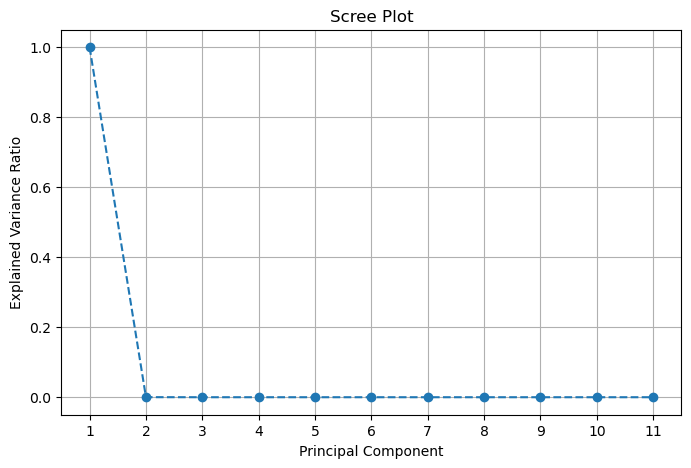

Index(['M1', 'S1', 'S2', 't_pair', 't_elapsed', 'Mrem', 'Srem', 'esca_v',
       'Mtot', 'gen', 'Z'],
      dtype='object')


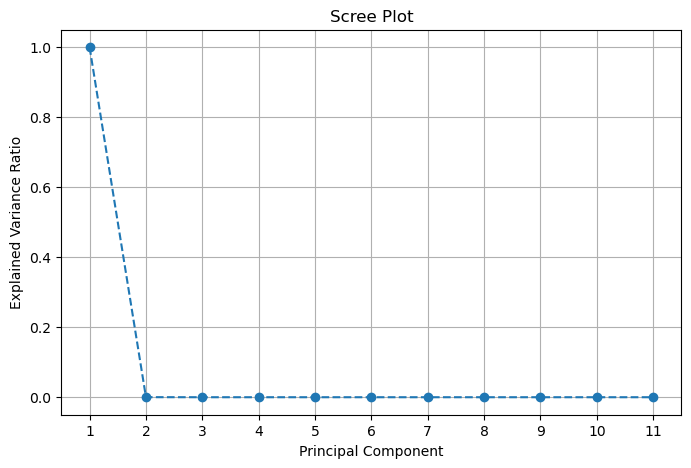

Index(['M1', 'M2', 'S2', 't_pair', 't_elapsed', 'Mrem', 'Srem', 'esca_v',
       'Mtot', 'gen', 'Z'],
      dtype='object')


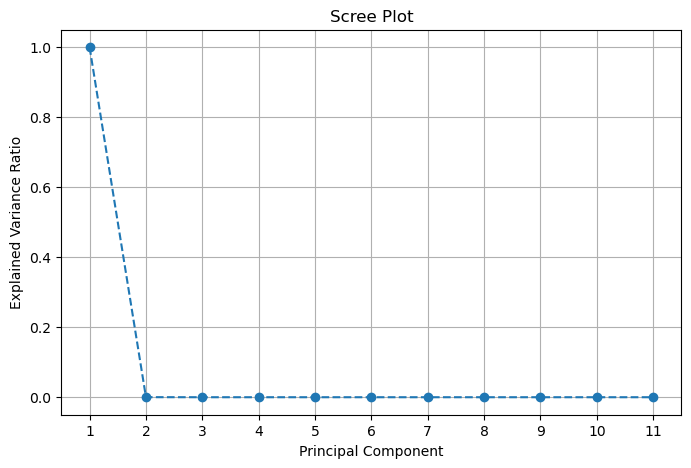

Index(['M1', 'M2', 'S1', 't_pair', 't_elapsed', 'Mrem', 'Srem', 'esca_v',
       'Mtot', 'gen', 'Z'],
      dtype='object')


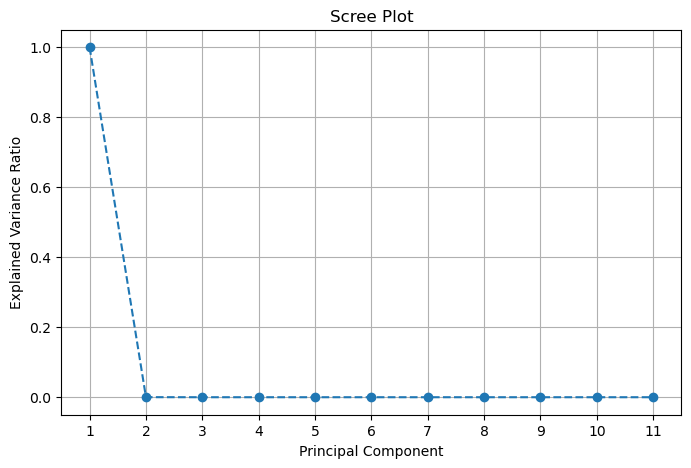

Index(['M1', 'M2', 'S1', 'S2', 't_elapsed', 'Mrem', 'Srem', 'esca_v', 'Mtot',
       'gen', 'Z'],
      dtype='object')


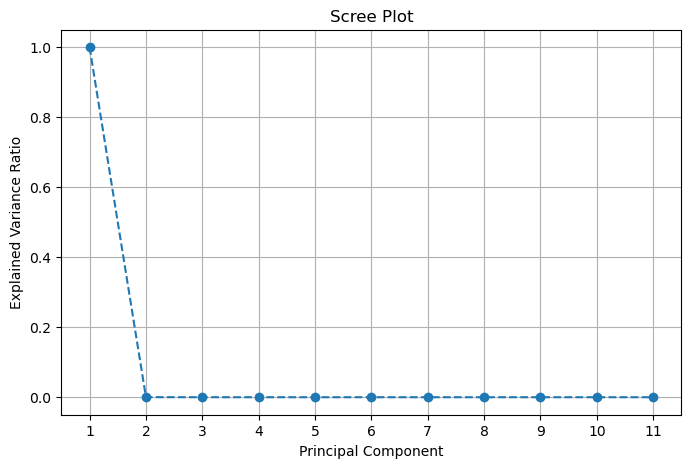

Index(['M1', 'M2', 'S1', 'S2', 't_pair', 'Mrem', 'Srem', 'esca_v', 'Mtot',
       'gen', 'Z'],
      dtype='object')


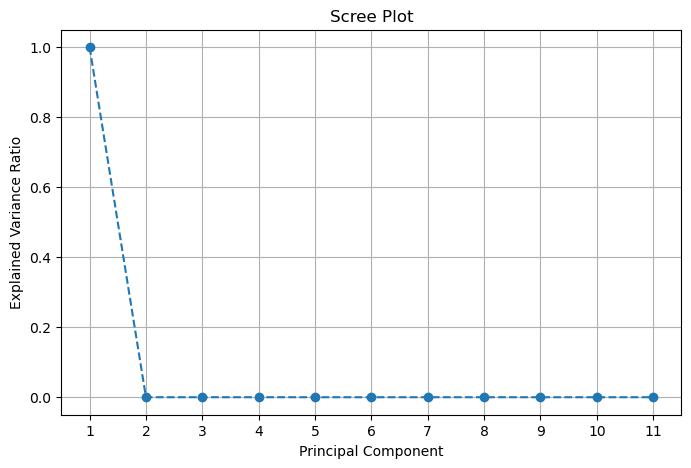

Index(['M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed', 'Srem', 'esca_v', 'Mtot',
       'gen', 'Z'],
      dtype='object')


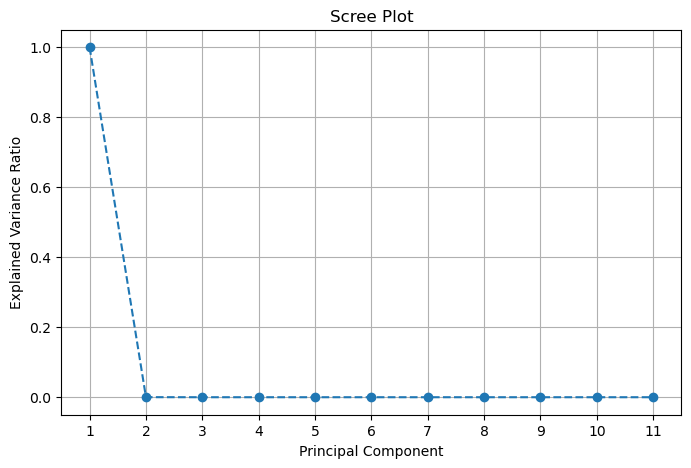

Index(['M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed', 'Mrem', 'esca_v', 'Mtot',
       'gen', 'Z'],
      dtype='object')


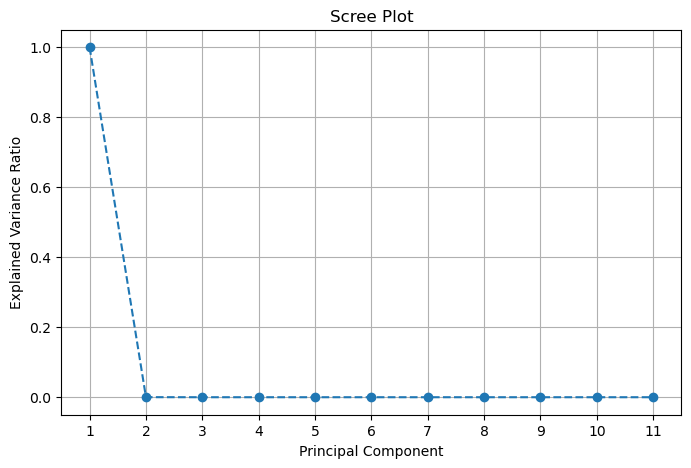

Index(['M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed', 'Mrem', 'Srem', 'Mtot',
       'gen', 'Z'],
      dtype='object')


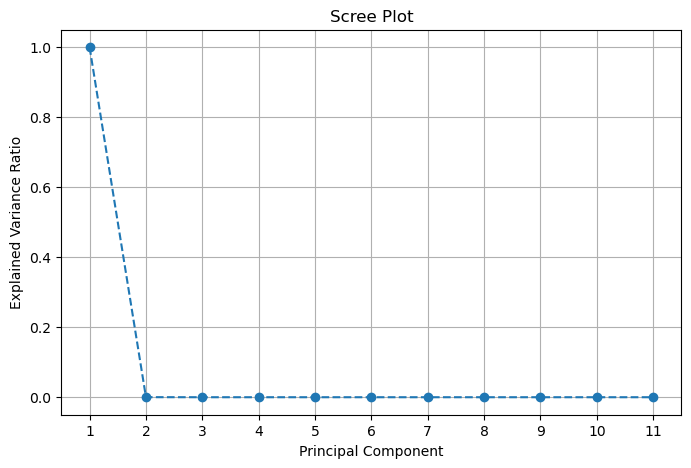

Index(['M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed', 'Mrem', 'Srem', 'esca_v',
       'gen', 'Z'],
      dtype='object')


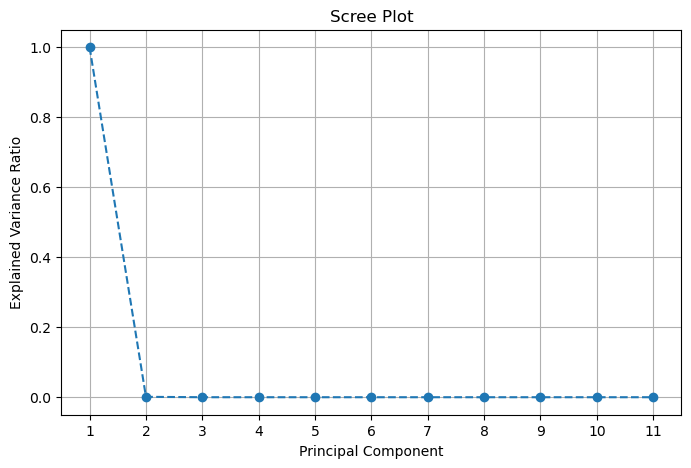

Index(['M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed', 'Mrem', 'Srem', 'esca_v',
       'Mtot', 'Z'],
      dtype='object')


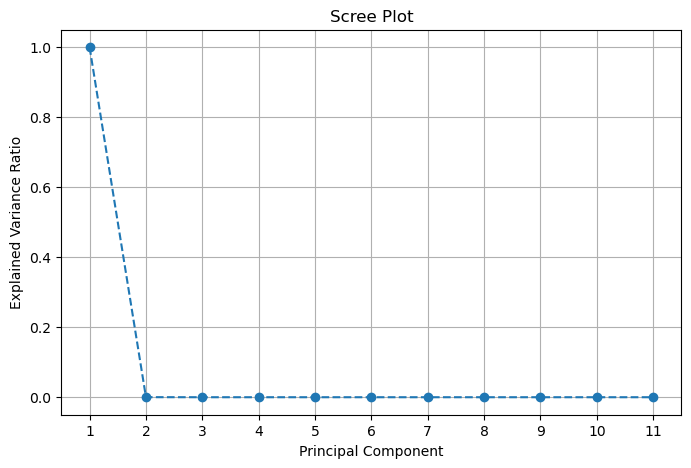

Index(['M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed', 'Mrem', 'Srem', 'esca_v',
       'Mtot', 'gen'],
      dtype='object')


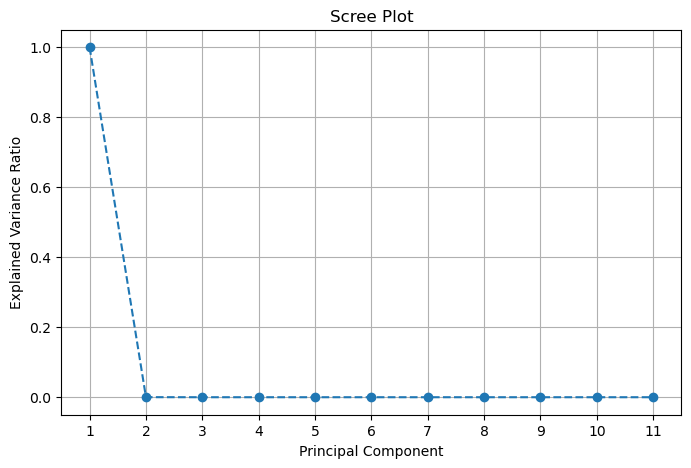

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



for i in df.columns:
    # Example data (replace with your data)
    X = df.drop(columns=[str(i)])  # Your dataset
    print(X.columns)

    # Apply PCA
    pca = PCA()
    pca.fit(X)

    # Plot the scree plot
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
             pca.explained_variance_ratio_, marker='o', linestyle='--')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
    plt.grid()
    plt.show()